In [10]:
%cd ~/fur/
import numpy as np
import scipy.signal
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
from scipy.optimize import minimize
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
#shift_03_10_2020.show_waveform_file_names()
waveforms_dir = shift_03_10_2020.get_waveforms_dir()
results_dir = shift_03_10_2020.get_results_dir()


/home/ilobach/fur


In [11]:
t1 = datetime(2020, 3, 10, 11, 32, 0)
t2 = datetime(2020, 3, 10, 12, 58, 0)

In [12]:
base_name = "nd_filters_data_03_10_2020"
res_df = analyze_one_dataset(
    shift_03_10_2020,
    base_name,
    t1,
    t2)

There are 19 files in this data set.
Started working on the file  RefCurve_2020-03-10_10_121356.Wfm.bin (1/19)


KeyboardInterrupt: 

In [13]:
res_df = pd.read_csv(results_dir.fi("res_df_"+base_name+".csv"))

In [14]:
alpha = 1.6e-19/2e-12*np.sqrt(2)/4
alpha

2.8284271247461904e-08

In [15]:
reg = linear_model.LinearRegression(fit_intercept=False)
x1 = np.insert(res_df["ch2_amplitude"].values,0,0)
x2 = x1**2
y = np.insert(res_df["var_of_ch1_amplitude"].values,0,0)-alpha*x1
reg.fit(x2.reshape((len(x2), 1)), y)
a = reg.coef_[0]
Mf = np.sqrt(2)/(4*a)
Mf

4127970.173990975

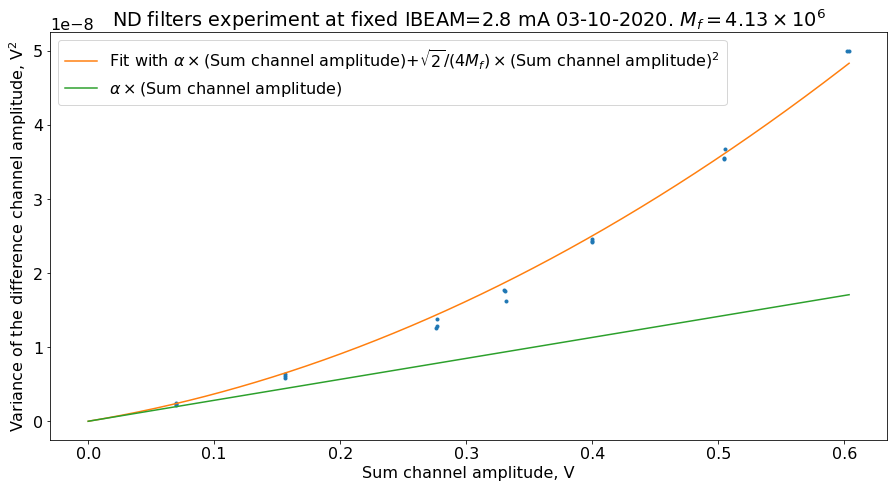

In [17]:
plt.plot(res_df["ch2_amplitude"],res_df["var_of_ch1_amplitude"] ,'.')
x_f = np.linspace(0,max(x1),1000)
plt.plot(x_f, alpha*x_f+a*x_f**2, label=r"Fit with $\alpha\times$(Sum channel amplitude)+$\sqrt{2}/(4M_f)\times$(Sum channel amplitude)$^2$")
plt.plot(x_f, alpha*x_f, label=r"$\alpha\times$(Sum channel amplitude)")
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.title(r"ND filters experiment at fixed IBEAM=2.8 mA 03-10-2020. $M_f=4.13\times 10^6$")
plt.legend()
plt.savefig(results_dir.fi("nd_filters_fixed_beam_current.pdf"), bbox_inches='tight')
plt.show()

$\alpha=\frac{\sqrt{2}e}{4 C_f}$,
it is the predicted slope for the quantum Poisson contribution. - This estimation doesn't take into account attenuation and dispersion in the cable yet. When they are taken into account the agreement might get even better.
$M_f$ is the numer of coherent modes, according to the least squares fit.

$M_f = 4.1\times 10^6$

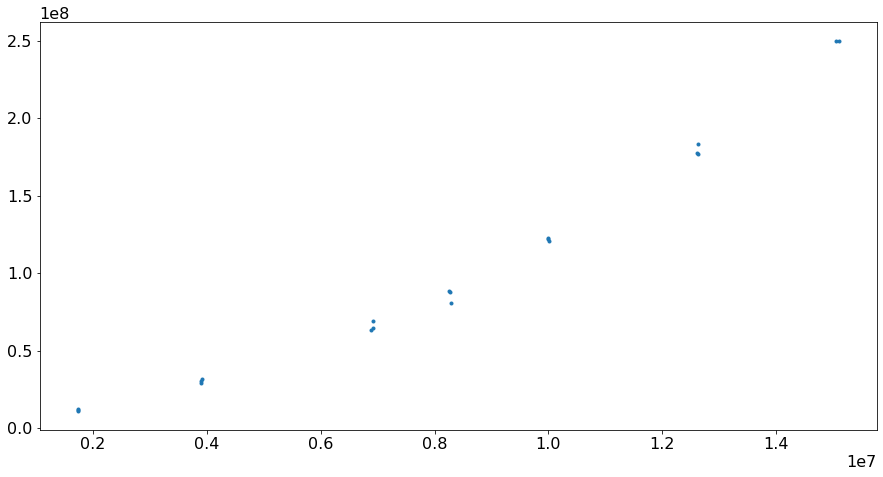

In [8]:
varN = 1/alpha**2*4*res_df["var_of_ch1_amplitude"].values
N = 1/alpha/np.sqrt(2)*res_df["ch2_amplitude"].values
plt.plot(N,varN,'.')
plt.show()